# IE6600 Computation and Visualization for Analytics

# Summer 1 Semester 2024

# Project 1 

Topic: Analysis of Electric Vehicle Population in the USA
- Group Number: Group 6
- Group Members: Atharv Nirhali, Snehal Yadav, Shreya Ale, Sanjana Rao

# Data Acquisition and Inspection

In [1]:
#Importing the data file
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [2]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [3]:
#Information about Dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,181455.000000,181458.000000,181458.000000,181458.000000,181060.000000,1.814580e+05,1.814550e+05
mean,98174.050718,2020.581793,57.826665,1040.236749,29.106904,2.214128e+08,5.297575e+10
std,2414.241968,2.991140,91.396074,8228.989085,14.892342,7.528561e+07,1.594876e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.830687e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.289155e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.561320e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [26]:
#Top 5 Brands with highest number of EVs
top_five_brands = df['Make'].value_counts().head(5)
print(top_five_brands)

TESLA        80819
NISSAN       14037
CHEVROLET    13864
FORD          9527
BMW           7680
Name: Make, dtype: int64


In [27]:
#Top 5 States with highest number of EVs
top_five_states = df['State'].value_counts().head(5)
top_five_states

WA    181060
CA       102
VA        47
MD        32
TX        26
Name: State, dtype: int64

In [28]:
#Bottom 5 Brands with lowest number of EVs
bottom_five_brands = df['Make'].value_counts().tail(5)
print(bottom_five_brands)

TH!NK                   5
GMC                     3
BENTLEY                 3
WHEEGO ELECTRIC CARS    3
ROLLS ROYCE             1
Name: Make, dtype: int64


# Data Cleaning and Preparation

In [29]:
#Checking for missing values and duplicate rows
def checking_for_missingVals_and_duplicates():
    # Check for missing values in the dataset
    missing_values = df.isnull().sum()
    print("Missing values in the dataset: ",missing_values)
    # Check for duplicate rows in the dataset
    duplicate_rows = df.duplicated().sum()
    print("No. of duplicate rows in the dataset: ",duplicate_rows)
checking_for_missingVals_and_duplicates()

Missing values in the dataset:  VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3

In [4]:
# Function to replace missing values - For this, we have first identified if the variable is numeric or non-numeric
#Then for non-numeric datatypes, we have replaced the missing values with mode and for numeric data types, we have replaced
# it with the median.
def replace_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Replace missing values with the mode for non-numeric columns
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            # Replace missing values with the median for numeric columns
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
 
# Function Call
replace_missing_values(df)
# Verifying if there are any missing values left
missing_values_after_replacement = df.isnull().sum()
missing_values_after_replacement

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [31]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [5]:
#Normalising data types
# Convert 'Model Year' to integer
df['Model Year'] = df['Model Year'].astype(int)
# Convert 'Electric Range' to integer
df['Electric Range'] = df['Electric Range'].astype(int)
# Convert 'Base MSRP' to float
df['Base MSRP'] = df['Base MSRP'].astype(float)
# Convert 'Legislative District' to integer
df['Legislative District'] = df['Legislative District'].astype(int)
# Convert 'DOL Vehicle ID' to string
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].astype(str)
# Convert '2020 Census Tract' to string to prevent loss of precision
df['2020 Census Tract'] = df['2020 Census Tract'].astype(str)
# Displaying updated data types
print("\nUpdated Data Types:")
print(df.dtypes)
df.head(5)


Updated Data Types:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int32
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int32
Base MSRP                                            float64
Legislative District                                   int32
DOL Vehicle ID                                        object
Vehicle Location                                      object
Electric Utility                                      object
202

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0.0,34,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011500.0
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0.0,22,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,53067011100.0
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0.0,22,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,53067012226.0
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0.0,20,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,53067012620.0
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0.0,14,225996361,POINT (-120.524012 46.5973939),PACIFICORP,53077000800.0


In [6]:
# Identifying categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [7]:
#The function integer_encode encodes the categorical variables to integers starting from 0
def integer_encode(df, column_names):
    df_encoded = df.copy()          
    # Encode categorical variables in the specified columns 
    for column in column_names:         
        df_encoded[column], _ = pd.factorize(df_encoded[column])          
    return df_encoded

column_names_to_encode_categorical_variables=['State', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

df_encoded = integer_encode(df, column_names_to_encode_categorical_variables)
df_encoded.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,0,98126.0,2017,AUDI,0,0,0,16,0.0,34,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011500.0
1,WAUUPBFF2J,Thurston,Olympia,0,98502.0,2018,AUDI,0,0,0,16,0.0,22,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,53067011100.0
2,5YJSA1E22H,Thurston,Lacey,0,98516.0,2017,TESLA,1,1,1,210,0.0,22,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,53067012226.0
3,1C4JJXP62M,Thurston,Tenino,0,98589.0,2021,JEEP,2,0,0,25,0.0,20,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,53067012620.0
4,5YJ3E1EC9L,Yakima,Yakima,0,98902.0,2020,TESLA,3,1,1,308,0.0,14,225996361,POINT (-120.524012 46.5973939),PACIFICORP,53077000800.0


In [35]:
df_encoded.to_csv('df_encoded2.csv', index=False)

# Exploratory Data Analysis (EDA), Statistical Analysis and Advanced Analysis

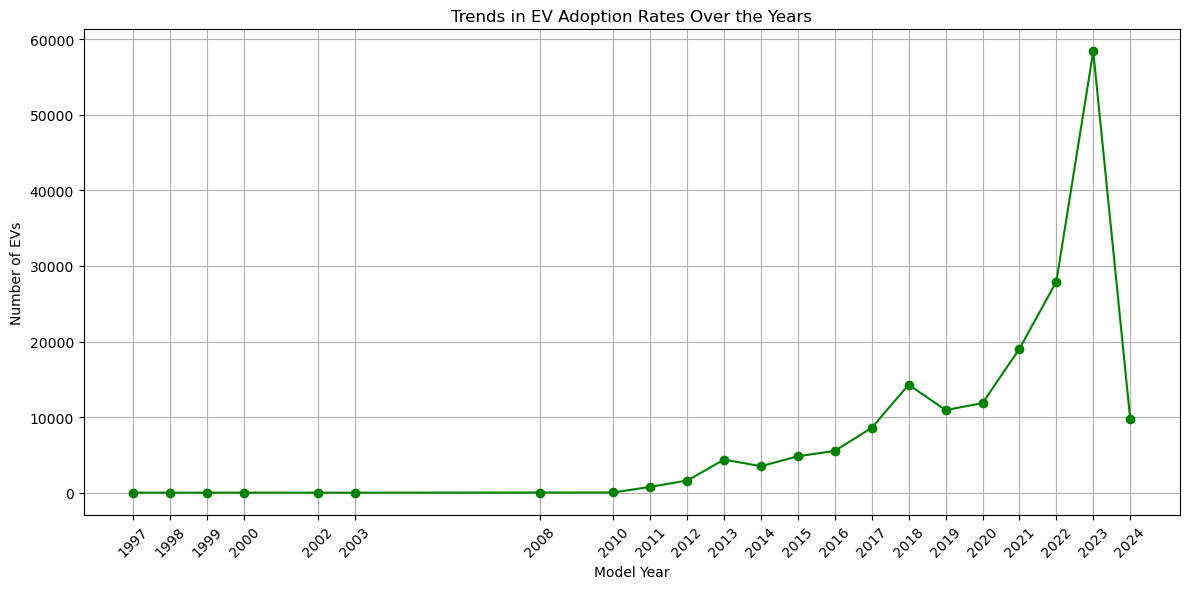

In [9]:
#Line Plot to Analyze Trends in EV Adoption Rates Over the Years

# Ensure the 'Model Year' column is in the correct format
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

# Group by model year and count the number of EVs for each year
ev_adoption_trends = df.groupby('Model Year').size().reset_index(name='EV Count')

# Plot the trends in EV adoption rates
plt.figure(figsize=(12, 6))
plt.plot(ev_adoption_trends['Model Year'], ev_adoption_trends['EV Count'], marker='o', color='green')
plt.title('Trends in EV Adoption Rates Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.xticks(ev_adoption_trends['Model Year'], rotation=45)
plt.tight_layout()
plt.show()

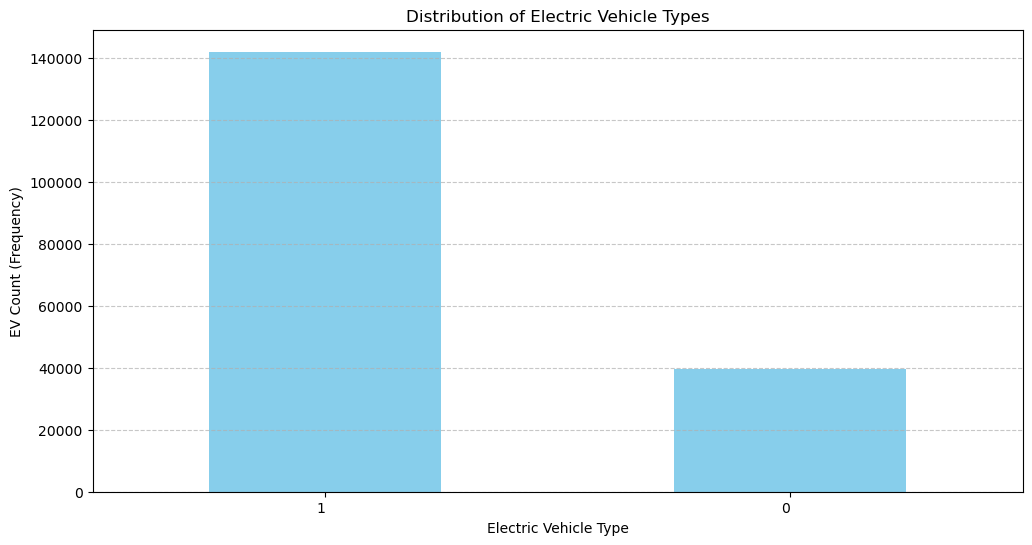

In [10]:
#Bar graph for the distribution of EV Types

plt.figure(figsize=(12, 6))
df_encoded['Electric Vehicle Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('EV Count (Frequency)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

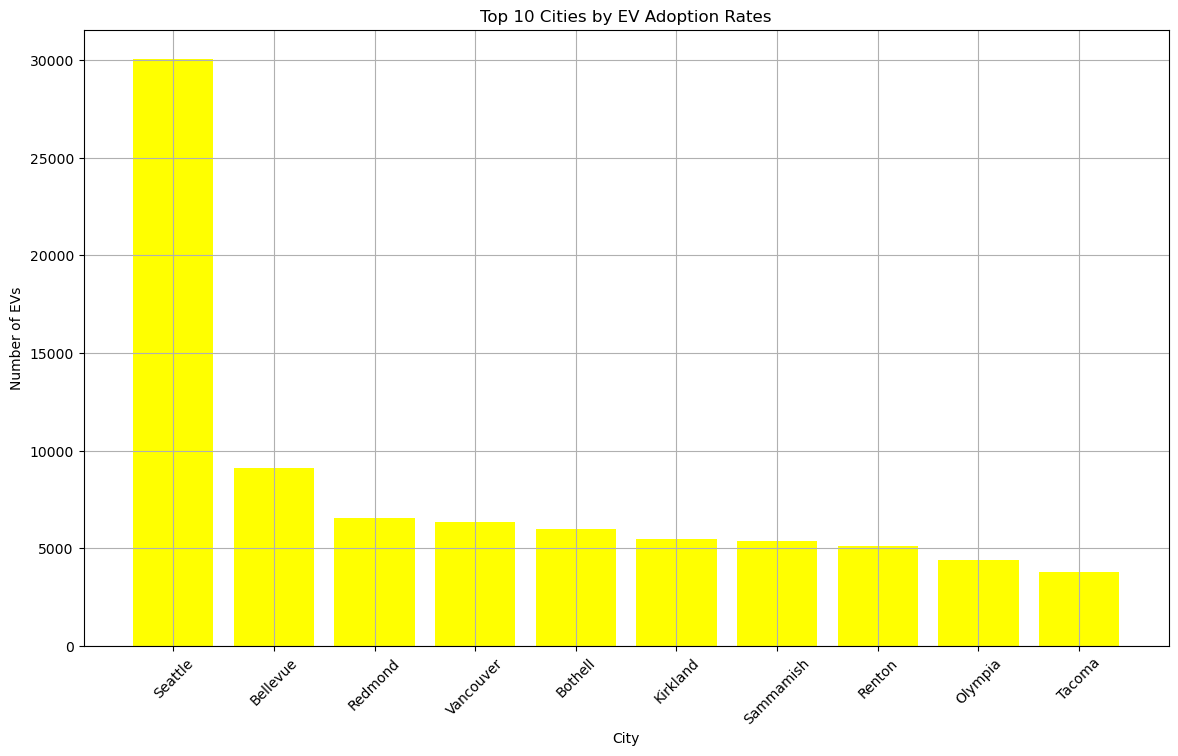

In [11]:
#Bar Graph to Visualize the Top 10 Cities by EV Adoption Rates
# Aggregating the data by City
ev_count_by_city = df_encoded['City'].value_counts().reset_index()
ev_count_by_city.columns = ['City', 'EV Count']

# Getting the top 10 cities for better visualization
top_10_cities = ev_count_by_city.head(10)

# Generating a bar plot 
plt.figure(figsize=(14, 8))
plt.bar(top_10_cities['City'], top_10_cities['EV Count'], color="yellow")

plt.title('Top 10 Cities by EV Adoption Rates')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

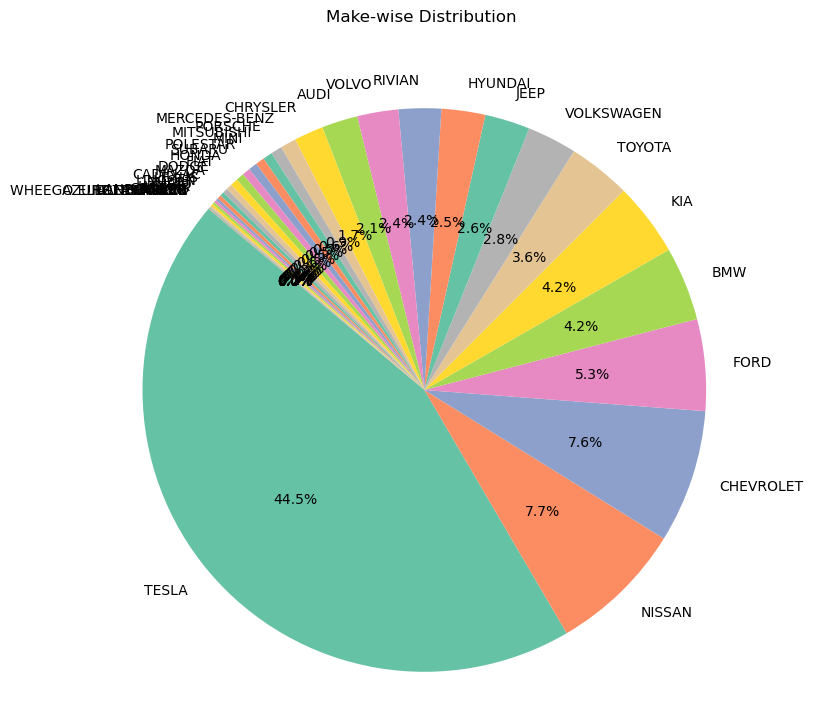

In [12]:
#Pie Chart for Analysing the Make (Manufacturers) of EV Vehicles

import seaborn as sns
# Counting the occurrences of each make
make_counts = df_encoded['Make'].value_counts()

# Using Seaborn to get a light color palette
colors = sns.color_palette('Set2', len(make_counts))

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Make-wise Distribution \n\n\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

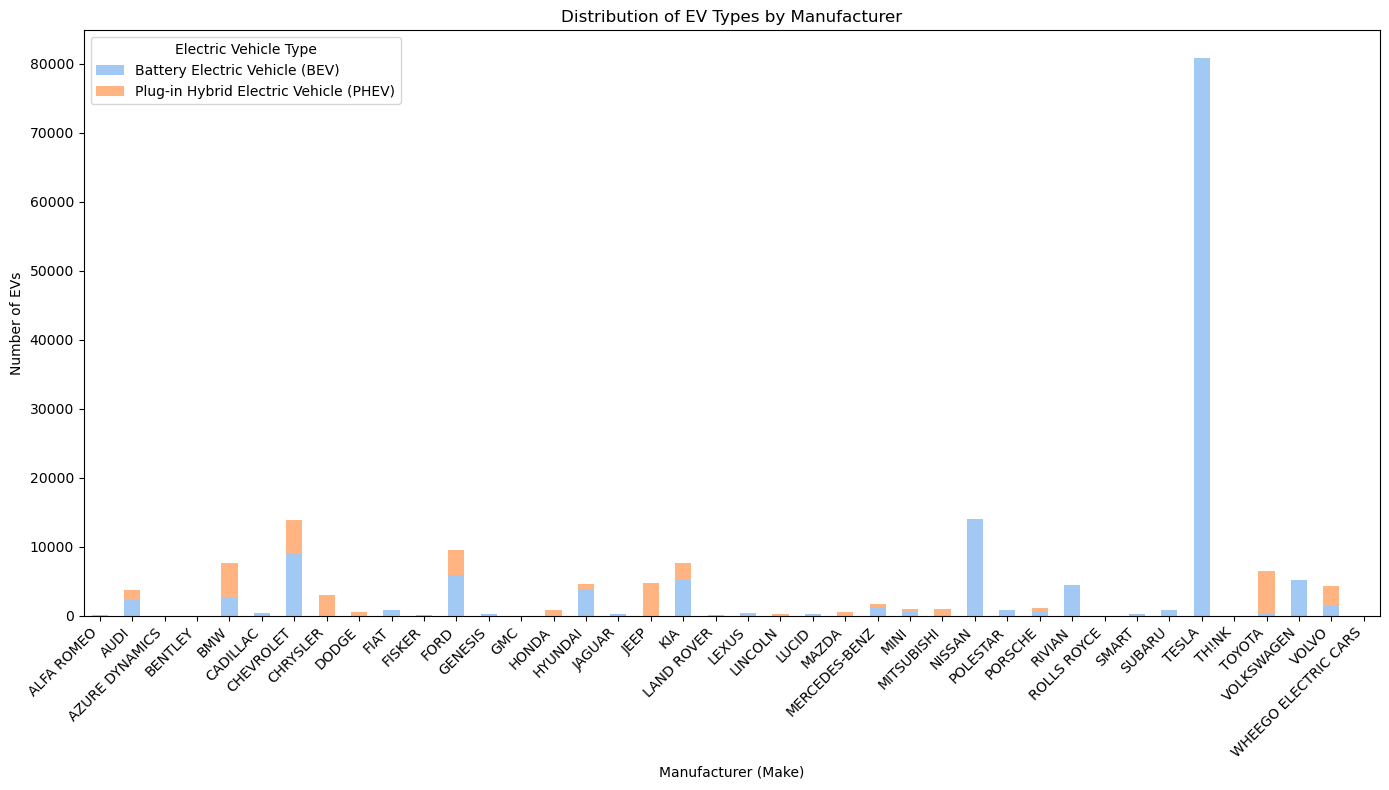

In [13]:
#Stacked Bar Chart for Visualizing the Distribution of EV Types by Manufacturer(Make)

# Aggregating the data by Make and Electric Vehicle Type
ev_type_by_make = df.groupby(['Make', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Using Seaborn to get a light color palette
palette = sns.color_palette('pastel', n_colors=ev_type_by_make.shape[1])

# Plotting the data using a stacked bar plot
ev_type_by_make.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)
plt.title('Distribution of EV Types by Manufacturer')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Number of EVs')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

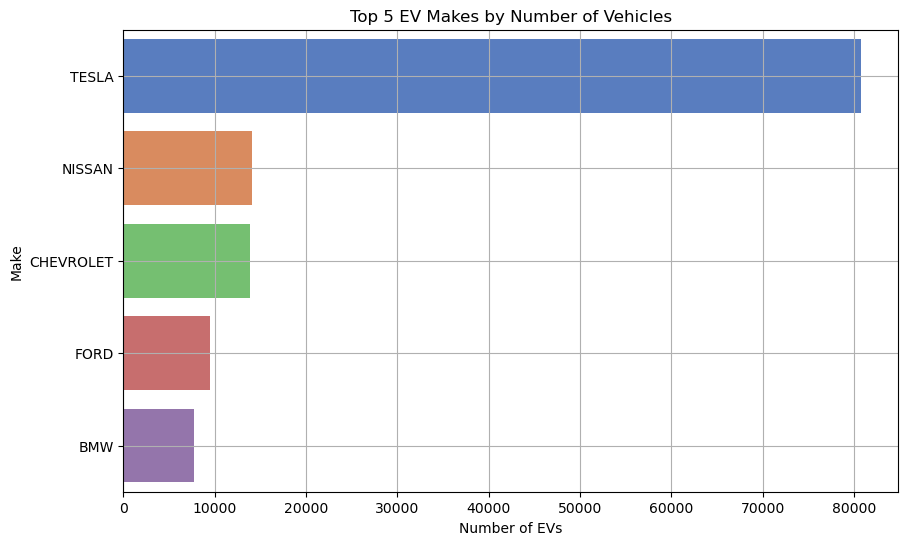

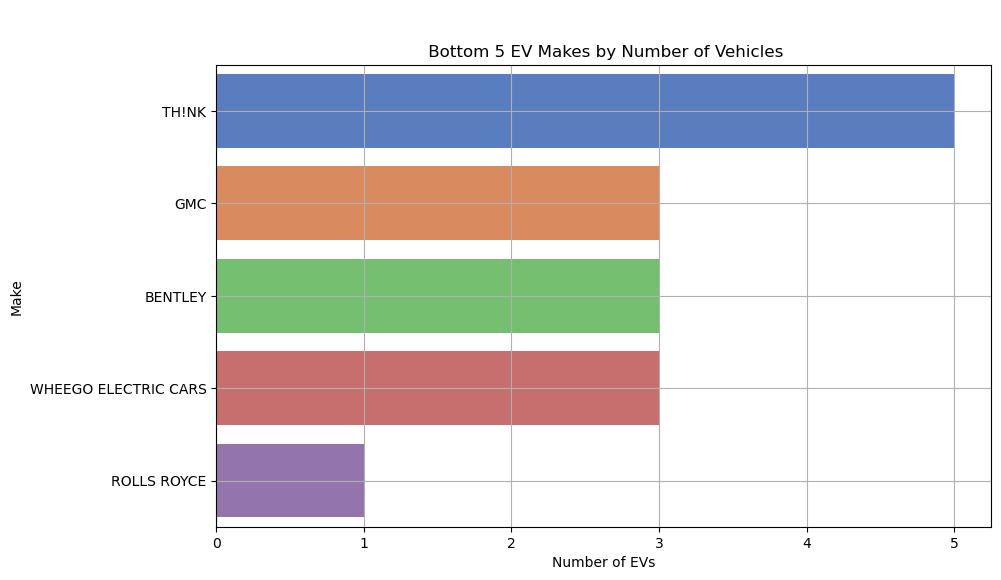

In [14]:
#Horizontal Bar Plot showing the Top 5 and Bottom 5 EV Makes Vs Number of Vehicles

# Aggregating the data by Make
ev_count_by_make = df_encoded['Make'].value_counts().reset_index()
ev_count_by_make.columns = ['Make', 'EV Count']

# Getting the top 5 makes
top_5_makes = ev_count_by_make.head(5)
# Getting the bottom 5 makes (excluding those with 0 EVs if any)
bottom_5_makes = ev_count_by_make[ev_count_by_make['EV Count'] > 0].tail(5)

# Generating a bar plot for the top 5 makes
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='Make', data=top_5_makes, palette="muted")
plt.title('Top 5 EV Makes by Number of Vehicles')
plt.xlabel('Number of EVs')
plt.ylabel('Make')
plt.grid(True)
plt.show()

# Generating a bar plot for the bottom 5 makes
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='Make', data=bottom_5_makes, palette="muted")
plt.title('\n\n Bottom 5 EV Makes by Number of Vehicles')
plt.xlabel('Number of EVs')
plt.ylabel('Make')
plt.grid(True)
plt.show()



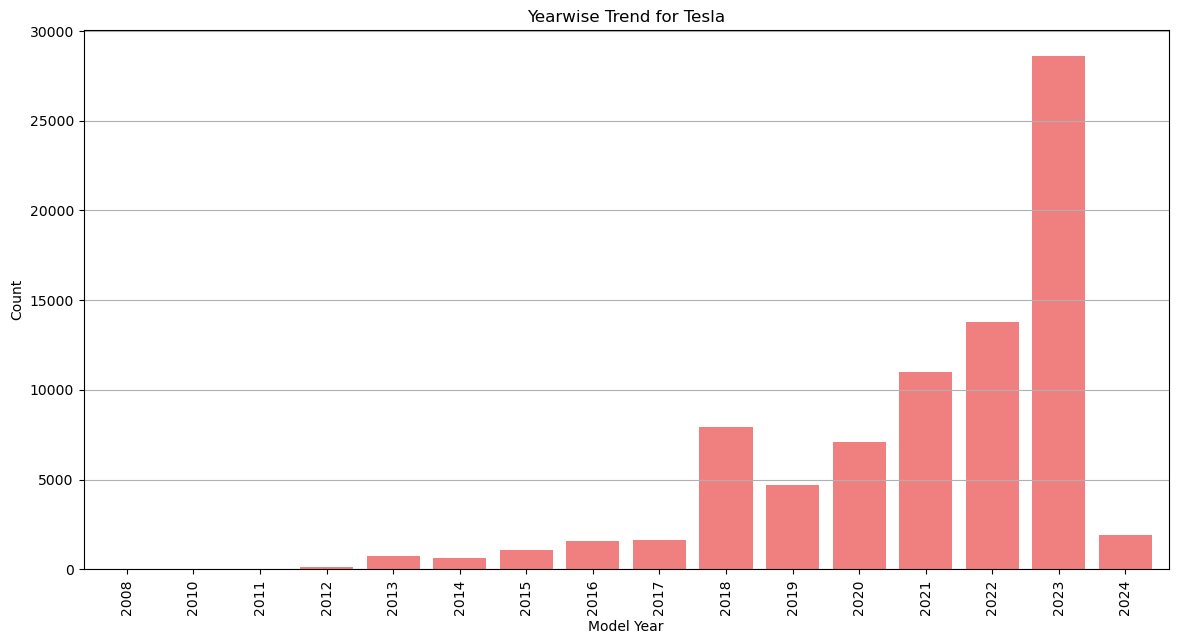

In [16]:
#Bar Graph to Analyse the Yearwise Trend for Tesla

# Filtering the dataframe to include only rows from the model year 2010
model_year_2010_df = df_encoded[df_encoded['Model Year'] == 2010]

# Filtering the dataframe to include only the top make from 2010
top_make_2010_df = df_encoded[df_encoded['Make'] == 'TESLA']

# Grouping by 'Model Year' and count the occurrences
grouped_top_make_2010_df = top_make_2010_df.groupby('Model Year').size()

# Plotting the bar chart
grouped_top_make_2010_df.plot(kind='bar', figsize=(14, 7), width=0.8, color='lightcoral')

plt.title(f'Yearwise Trend for Tesla')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

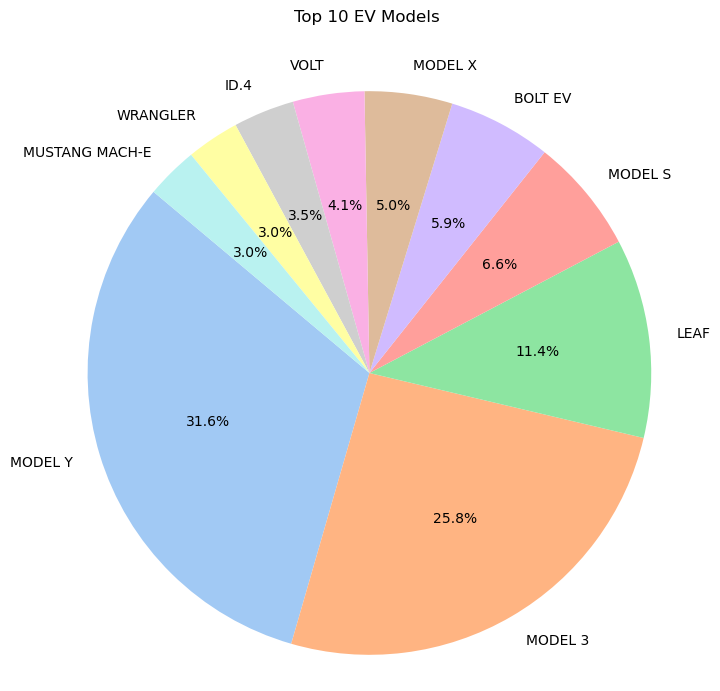

In [17]:
#Pie Chart depicting the Top 10 EV Models from the dataset

# Aggregating the data by Model
ev_count_by_model = df['Model'].value_counts().reset_index()
ev_count_by_model.columns = ['Model', 'EV Count']

# Getting the top 10 models for better visualization in the pie chart
top_10_models = ev_count_by_model.head(10)

# Generating a pie chart for the top 10 models
plt.figure(figsize=(8,8))
plt.pie(top_10_models['EV Count'], labels=top_10_models['Model'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(top_10_models)))
plt.title('Top 10 EV Models \n\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

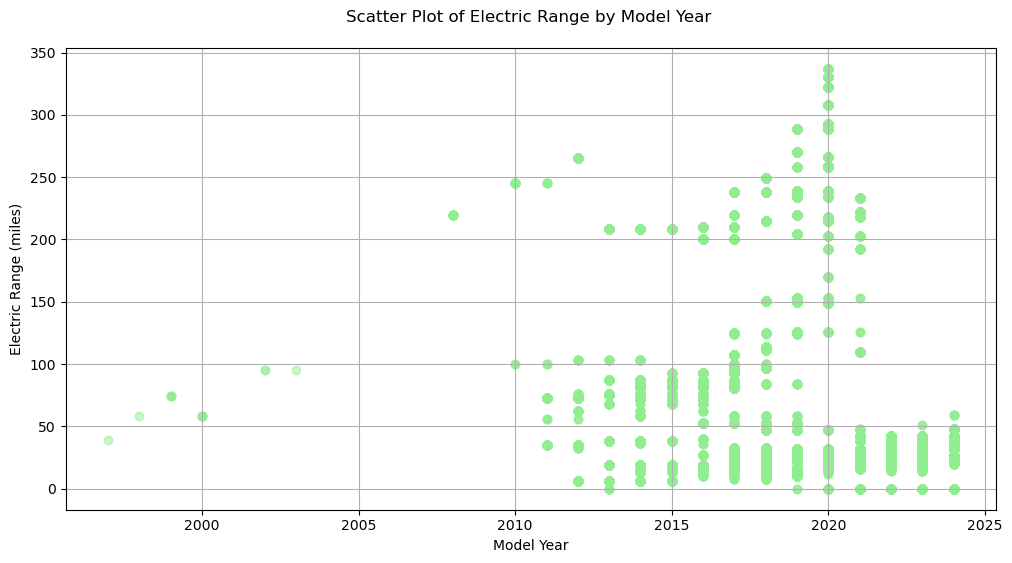

In [19]:
#Scatter Plot for Visualizing trends in Electric Range by Model Year

# Ensuring the necessary columns are in the correct format
df_encoded['Model Year'] = pd.to_numeric(df_encoded['Model Year'], errors='coerce')
df_encoded['Electric Range'] = pd.to_numeric(df_encoded['Electric Range'], errors='coerce')

# Generating the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_encoded['Model Year'], df_encoded['Electric Range'], alpha=0.5, color='lightgreen')
plt.title('Scatter Plot of Electric Range by Model Year \n')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

In [1]:
#Heatmap of Correlation Matrix for EV Data

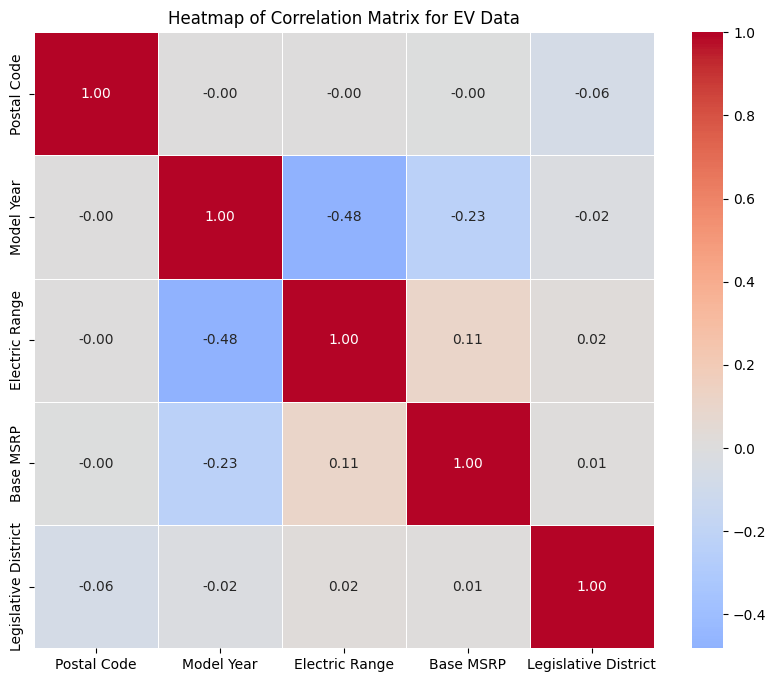

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are numeric
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Correlation Matrix for EV Data')
plt.show()